In [26]:
import pandas as pd
import json 
import numpy as np
from tqdm import tqdm
import ast
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
import kmedoids

In [28]:
from scipy.spatial import distance
from scipy.special import kl_div

In [29]:
categories_interest = pd.read_csv('../categories_distribution_subprofiles_10k.csv', index_col=0)

In [30]:
categories_interest

,0,1,2,3,4,5,6,7,8,9,10,11,12
504290,0.371146,0.000000,0.000000,0.026510,0.073689,0.000000,0.121311,0.362576,0.000000,0.018257,0.000000,0.000000,0.026510
219624,0.338185,0.024156,0.000000,0.022688,0.048312,0.000000,0.151739,0.286625,0.000000,0.058824,0.048312,0.021158,0.000000
10420,0.338911,0.000000,0.000000,0.000000,0.217548,0.021182,0.037526,0.042364,0.021182,0.185595,0.081045,0.054647,0.000000
511303,0.152604,0.000000,0.000000,0.021801,0.078364,0.037012,0.057583,0.238153,0.000000,0.354836,0.020975,0.038672,0.000000
184564,0.276437,0.000000,0.000000,0.024599,0.079940,0.000000,0.089455,0.154720,0.027644,0.273652,0.027644,0.045911,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292183,0.282792,0.000000,0.000000,0.000000,0.000000,0.000000,0.054277,0.087007,0.000000,0.393240,0.000000,0.182684,0.000000
646273,0.476536,0.000000,0.000000,0.000000,0.029783,0.000000,0.110690,0.174696,0.029783,0.128191,0.000000,0.050321,0.000000
324828,0.174910,0.000000,0.000000,0.000000,0.260469,0.047388,0.012758,0.048996,0.000000,0.349710,0.000000,0.105769,0.000000
108536,0.378734,0.000000,0.022237,0.000000,0.313166,0.000000,0.075075,0.094684,0.000000,0.055484,0.030366,0.030254,0.000000


In [31]:
users_list = categories_interest.index.tolist()

# Compute polarization values

## Entropy

In [32]:
from scipy.stats import entropy

In [33]:
u_values = pd.DataFrame(index=users_list)

In [34]:
def normalized_entropy(distribution):
    return entropy(distribution, base=2)/np.log2(len(distribution))

In [35]:
for u in tqdm(users_list):
    distrib_user = categories_interest.loc[u].values.tolist()
    entropy_value = normalized_entropy(distrib_user)
    u_values.loc[u,'entropy'] = entropy_value

100%|██████████| 10000/10000 [00:01<00:00, 8305.28it/s]


In [36]:
u_values

,entropy
504290,0.565055
219624,0.673612
10420,0.699441
511303,0.691014
184564,0.720360
...,...
292183,0.547910
646273,0.594439
324828,0.627033
108536,0.626099


In [37]:
u_values.describe()

,entropy
count,10000.000000
mean,0.652867
std,0.092833
min,0.106000
25%,0.600319
50%,0.664956
75%,0.718384
max,0.900946


[]

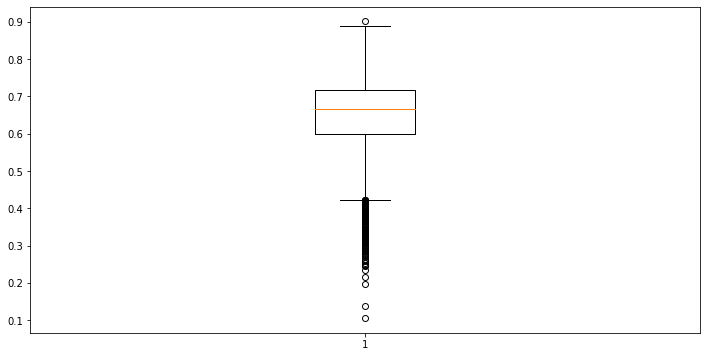

In [38]:
plt.figure(figsize=(12,6))
plt.boxplot(u_values)
plt.plot()

## Polarization index $\rho_u$

In [39]:
# for u in tqdm(users_list):
#     distrib_user = categories_interest.loc[u].values.tolist()
#     value = max(distrib_user)
#     u_values.loc[u,'polarization_index'] = value

## GRAIL 

In [14]:
def f_sigmoid_optim(x, a):
    return(x**(a)/(x**(a)+(1-x)**(a)))

In [15]:
# for u in tqdm(users_list):
#     entropy = 1 - u_values.loc[u].entropy
#     grail_value = f_sigmoid_optim(entropy, a=2)
#     u_values.loc[u,'grail_value_a2'] = grail_value

In [16]:
# u_values = u_values[['entropy','polarization_index','grail_value_a2']]

In [17]:
# u_values

# Clustering

## K-Means 1D

In [18]:
import kmeans1d

In [19]:
u_values

,entropy
504290,0.565055
219624,0.673612
10420,0.699441
511303,0.691014
184564,0.720360
...,...
292183,0.547910
646273,0.594439
324828,0.627033
108536,0.626099


In [20]:
x = u_values['entropy'].tolist()

In [21]:
clusters, centroids = kmeans1d.cluster(x, 5)

In [22]:
u_values['cluster_1d'] = clusters

In [23]:
u_values['cluster_1d'].value_counts()

3    3179
2    2810
4    1836
1    1658
0     517
Name: cluster_1d, dtype: int64

<AxesSubplot:xlabel='entropy', ylabel='Density'>

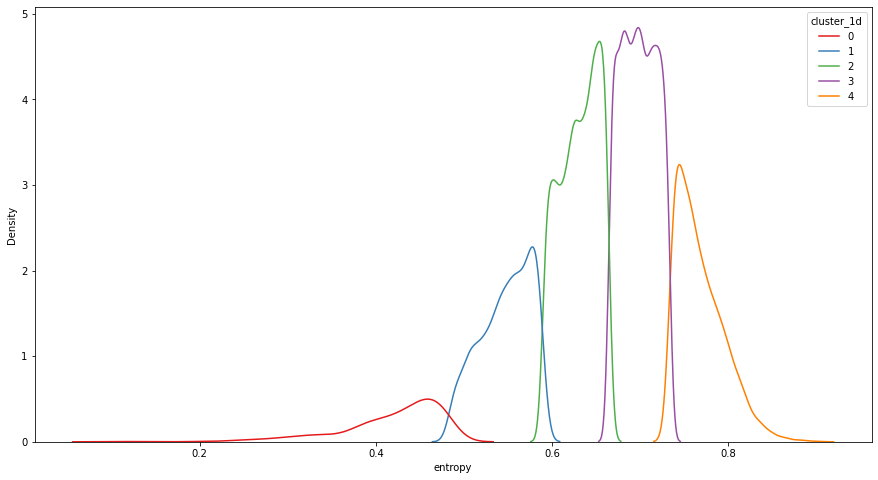

In [24]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=u_values, x='entropy', hue='cluster_1d', palette='Set1')

In [25]:
u_values.groupby('cluster_1d').describe()

entropy                                                    \
             count      mean       std       min       25%       50%   
cluster_1d                                                             
0            517.0  0.419610  0.058074  0.106000  0.393826  0.436850   
1           1658.0  0.547450  0.028650  0.483635  0.525487  0.551567   
2           2810.0  0.630689  0.021645  0.589081  0.612736  0.632556   
3           3179.0  0.698580  0.019705  0.664663  0.681623  0.698384   
4           1836.0  0.768541  0.027363  0.733597  0.746214  0.761919   

                                
                 75%       max  
cluster_1d                      
0           0.462575  0.483207  
1           0.572747  0.589054  
2           0.649491  0.664591  
3           0.715589  0.733537  
4           0.785432  0.900946

<AxesSubplot:xlabel='cluster_1d', ylabel='entropy'>

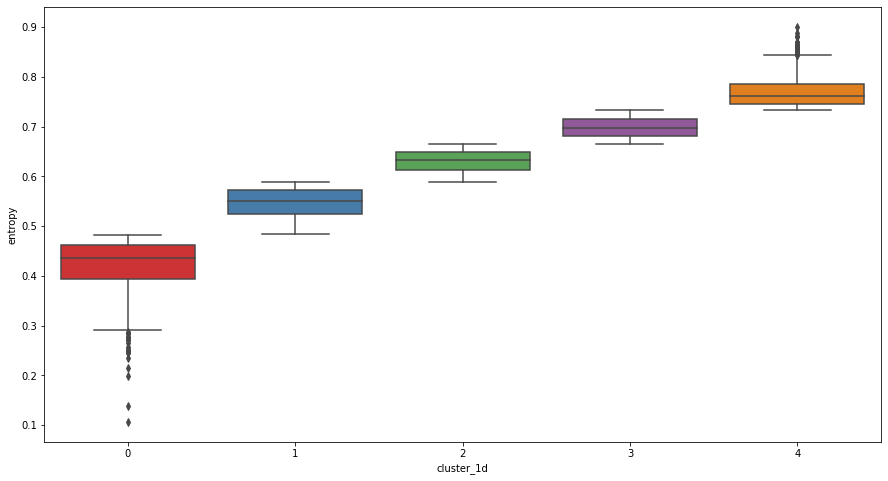

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=u_values, x='cluster_1d', y='entropy', palette='Set1')

In [27]:
# u_values[['entropy','grail_value_a2','cluster_1d']].to_csv('clusters_results.csv')

## Fixed values

In [40]:
u_values['entropy'] = u_values['entropy'].round(2)

In [41]:
u_values.describe()

,entropy
count,10000.000000
mean,0.652889
std,0.092869
min,0.110000
25%,0.600000
50%,0.660000
75%,0.720000
max,0.900000


In [42]:
for u in tqdm(users_list):
    if u_values.loc[u, 'entropy'] <= 0.2:
        u_values.loc[u, 'cluster_fix'] = 0
    elif ((u_values.loc[u, 'entropy'] > 0.2) and (u_values.loc[u,'entropy'] <= 0.3)):
        u_values.loc[u,'cluster_fix'] = 1
    elif ((u_values.loc[u, 'entropy'] > 0.3) and (u_values.loc[u,'entropy'] <= 0.4)):
        u_values.loc[u,'cluster_fix'] = 2
    elif ((u_values.loc[u, 'entropy'] > 0.4) and (u_values.loc[u,'entropy'] <= 0.5)):
        u_values.loc[u,'cluster_fix'] = 3
    elif ((u_values.loc[u, 'entropy'] > 0.5) and (u_values.loc[u,'entropy'] <= 0.6)):
        u_values.loc[u,'cluster_fix'] = 4
    elif ((u_values.loc[u, 'entropy'] > 0.6) and (u_values.loc[u,'entropy'] <= 0.7)):
        u_values.loc[u,'cluster_fix'] = 5
    elif ((u_values.loc[u, 'entropy'] > 0.7) and (u_values.loc[u,'entropy'] <= 0.8)):
        u_values.loc[u,'cluster_fix'] = 6
    elif ((u_values.loc[u, 'entropy'] > 0.8) and (u_values.loc[u,'entropy'] <= 0.9)):
        u_values.loc[u,'cluster_fix'] = 7
    elif u_values.loc[u, 'entropy'] > 0.9:
        u_values.loc[u,'cluster_fix'] = 8     

u_values['cluster_fix'] = u_values['cluster_fix'].astype(int)

100%|██████████| 10000/10000 [00:01<00:00, 6428.10it/s]


In [43]:
u_values

,entropy,cluster_fix
504290,0.57,4
219624,0.67,5
10420,0.70,5
511303,0.69,5
184564,0.72,6
...,...,...
292183,0.55,4
646273,0.59,4
324828,0.63,5
108536,0.63,5


In [44]:
u_values['cluster_fix'].value_counts()

5    4250
6    2894
4    1964
3     525
7     207
2     133
1      24
0       3
Name: cluster_fix, dtype: int64

<AxesSubplot:xlabel='entropy', ylabel='Density'>

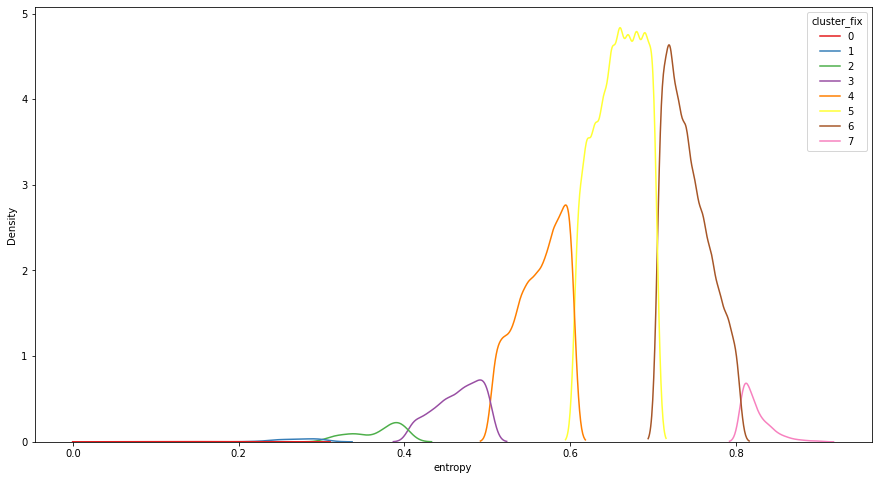

In [45]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=u_values, x='entropy', hue='cluster_fix', palette='Set1')

In [46]:
u_values.groupby('cluster_fix')['entropy'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_fix,,,,,,,,
0,3.0,0.150000,0.045826,0.11,0.125,0.140,0.17,0.2
1,24.0,0.272083,0.023215,0.22,0.250,0.275,0.29,0.3
2,133.0,0.368722,0.029009,0.31,0.340,0.380,0.39,0.4
3,525.0,0.464857,0.027299,0.41,0.440,0.470,0.49,0.5
4,1964.0,0.563854,0.027810,0.51,0.540,0.570,0.59,0.6
5,4250.0,0.658854,0.027717,0.61,0.640,0.660,0.68,0.7
6,2894.0,0.743179,0.026156,0.71,0.720,0.740,0.76,0.8
7,207.0,0.823768,0.017188,0.81,0.810,0.820,0.83,0.9


<AxesSubplot:xlabel='cluster_fix', ylabel='entropy'>

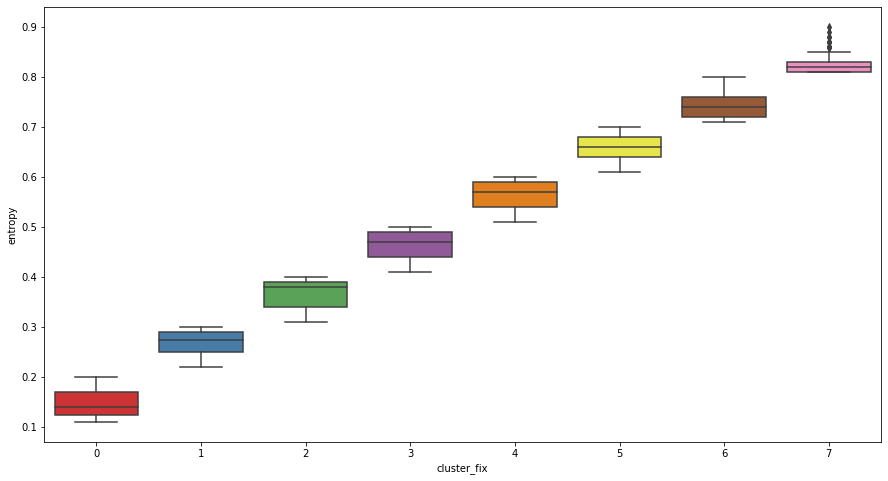

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=u_values, x='cluster_fix', y='entropy', palette='Set1')

In [49]:
u_values.to_csv('cluster_users.csv')

# Evaluation par cluster

## Librairies, fonctions et données

In [34]:
from clayrs import content_analyzer as ca
from clayrs import recsys as rs
from clayrs import evaluation as eva

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import math

In [36]:
def get_performances(train, test):
    em = eva.EvalModel(
        [train],
        [test],
        metric_list=[
            eva.PrecisionAtK(k=10, sys_average='macro'),
            eva.RecallAtK(k=10, sys_average='macro'),
            eva.FMeasureAtK(k=10, sys_average='macro'),
            eva.MRR(),
            eva.NDCGAtK(k=10),
            # eva.CatalogCoverage(catalog),
            # eva.GiniIndex()
        ],    
    )
    sys_result, users_result = em.fit()
    return sys_result, users_result

In [37]:
def triangular_matrix(m):
    m_tri = m.where(np.triu(np.ones(m.shape),k=1).astype(bool))
    return m_tri

In [38]:
def ILS(m):
    m_tri = triangular_matrix(m).stack().reset_index()
    m_tri.columns = ['i','j','similarity']
    ils = (m_tri['similarity'].sum())/len(m_tri)
    return ils

In [39]:
def embeddings_to_df(e):
    e_list = e.tolist()
    df_e = pd.DataFrame(e_list)
    return df_e

In [40]:
def compute_ils(recos, similarity_matrix, list_users):
    dict_ils = {}
    for u in tqdm(list_users):
        recos_user = recos[recos['user_id']==u]
        news_ids = recos_user['item_id'].tolist()
        news_ids.sort()
        sim_matrix_user = similarity_matrix[similarity_matrix.index.isin(news_ids)][news_ids]
        ils_user = ILS(sim_matrix_user)
        dict_key = {u:ils_user}
        dict_ils.update(dict_key)
    return dict_ils

In [41]:
def get_results_categories(initial_results):
    results_categories = initial_results.copy()
    results_categories = results_categories.rename(columns={'item_id':'NewsID'})
    results_categories = results_categories.merge(news[['NewsID','cluster_hdbscan','proba']], on='NewsID').rename(columns={'cluster_hdbscan':'category'})
    results_categories['proba'] = results_categories['proba'].replace(0, 1)
    return results_categories

In [42]:
def compute_dcg(gain_vector):
    dcg_value = 0
    for i in range(1, len(gain_vector)+1, 1):
        val = gain_vector[i-1]/(math.log2(1+i))
        dcg_value = dcg_value + val
    return dcg_value

In [43]:
def alpha_ndcg(recos, list_users, users_interest_df, alpha):
    dict_alpha_ndcg = {}
    #For each user
    for u in tqdm(list_users):
        #Get the recommendation list of a specific user
        recos_user = recos[recos['user_id']==u].reset_index(drop=True)
        if len(recos_user)>=10:
            recos_user = recos_user.iloc[:10,:]
        #Get the corresponding list of news categories 
        recos_categories = recos_user['category'].tolist()
        
        #Initialize the gain vector
        gain_vector = []
        #Only compute alpha ndcg when there is 10 recos or more

        for i in range(1,len(recos_user)+1, 1):
            #Get the category
            cat = recos_categories[i-1]
            #Get the interest of the user for the category
            user_interest_cat = users_interest.loc[u,cat]
            if i ==1:
                r = 0
            else:
                r = recos_categories[:i-1].count(cat)
            #Compute the gain for the k-th reco
            value_gain_k = recos_user.loc[i-1,'proba'] *  user_interest_cat * (1-alpha)**(r)
            #Update the gain vector
            gain_vector.append(value_gain_k)
        #Get the optimal gain vector (sorted gain vector in descending order)
        optimal_gain_vector = sorted(gain_vector, reverse=True)
        #Compute Discounted Cumulative Gain
        dcg = compute_dcg(gain_vector)
        #Compute Ideal Discounted Cumulative Gain
        idcg = compute_dcg(optimal_gain_vector)
        #Compute alpha-ndcg
        alpha_ndcg = dcg/idcg
        
        dict_key = {u:alpha_ndcg}
        dict_alpha_ndcg.update(dict_key)
        # else:
        #     dict_key = {u:np.nan}
        #     dict_alpha_ndcg.update(dict_key)
    return dict_alpha_ndcg        

In [44]:
def ndcg_ia(recos, list_users, users_interest_df):
    dict_ndcg_ia = {}
    for u in tqdm(list_users):
        recos_user = recos[recos['user_id']==u].reset_index(drop=True)
        if len(recos_user)>=10:
            recos_user = recos_user.iloc[:10,:]
        recos_categories = recos_user['category'].tolist()
        user_interest = pd.DataFrame(users_interest_df.loc[u])
        categories_interest = user_interest[user_interest[u]!=0].index.tolist()
        # nb_categories_interest = len(categories_interest)        
        list_values = []
        for c in range(len(categories_interest)):
            cat = categories_interest[c]
            user_interest_cat = users_interest.loc[u,cat]
            gain_vector_c = [1 if i==cat else 0 for i in recos_categories]
            optimal_gain_vector_c = sorted(gain_vector_c, reverse=True)
            dcg_c = compute_dcg(gain_vector_c)
            idcg_c = compute_dcg(optimal_gain_vector_c)
            if idcg_c != 0:
                ndcg_c = user_interest_cat*(dcg_c/idcg_c)
            else:
                ndcg_c = 0
            list_values.append(ndcg_c)
        ndcg_ia = sum(list_values)
        dict_key = {u:ndcg_ia}
        dict_ndcg_ia.update(dict_key)
        # else:
        #     dict_key = {u:np.nan}
        #     dict_ndcg_ia.update(dict_key)
    return dict_ndcg_ia

In [45]:
def s_recall(recos, list_users, categories_list, k=10):
    dict_srecall = {}
    nb_categories = len(categories_list)
    for u in tqdm(list_users):
        recos_user = recos[recos['user_id']==u].reset_index(drop=True)
        recos_categories = recos_user['category'][:k].tolist()
        s_recall_user = len(set(recos_categories))/nb_categories
        dict_key = {u:s_recall_user}
        dict_srecall.update(dict_key)
    return dict_srecall

In [46]:
behaviors = pd.read_csv('../behaviors_sub_profiles_10k.csv', index_col=0)

In [47]:
# News info
news = pd.read_csv('../../thematic_clustering/lda_128_large/news_thematic_clustering_large_final.csv', index_col=0)
news['cluster_hdbscan'] = news['cluster_hdbscan']+1

In [48]:
# Embeddings df
embeddings_lda_128 = pd.read_json('../../baseline/news_codified_lda_128/contents.json')
embeddings_lda_128['lda_128#0'] = embeddings_lda_128['lda_128#0'].apply(ast.literal_eval)
news_embeddings_lda = embeddings_to_df(embeddings_lda_128['lda_128#0'])
news_embeddings_lda.index = embeddings_lda_128['content_id']

In [49]:
similarity_matrix = pd.DataFrame(cosine_similarity(news_embeddings_lda))
similarity_matrix.index = news_embeddings_lda.index.tolist()
similarity_matrix.columns = news_embeddings_lda.index.tolist()

In [50]:
users_interest = pd.read_csv('../categories_distribution_subprofiles_10k.csv', index_col=0)

In [51]:
users_interest.columns = users_interest.columns.astype(int)

In [53]:
categories_list = users_interest.columns.tolist()
categories_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Resultats par cluster

## Clustering K-Means 1D

In [54]:
users_c1 = u_values[u_values['cluster_1d']==0].index.tolist()
users_c2 = u_values[u_values['cluster_1d']==1].index.tolist()
users_c3 = u_values[u_values['cluster_1d']==2].index.tolist()
users_c4 = u_values[u_values['cluster_1d']==3].index.tolist()
users_c5 = u_values[u_values['cluster_1d']==4].index.tolist()

In [55]:
results_a_02 = pd.read_csv('re_ranking_results/re_ranking/div_a_02.csv')
results_a_04 = pd.read_csv('re_ranking_results/re_ranking/div_a_04.csv')
results_a_06 = pd.read_csv('re_ranking_results/re_ranking/div_a_06.csv')

In [56]:
results_a_02 = results_a_02[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
results_a_04 = results_a_04[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
results_a_06 = results_a_06[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})

In [57]:
test_set = pd.read_csv('../report_subprofiles_cv_10k/HoldOutPartitioning_test_split0.csv')
test_set['user_id_init'] = test_set['user_id'].str.split('-').str[0]
test_set = test_set[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
test_set['user_id'] = test_set['user_id'].astype(int)

In [58]:
results_02_c1 = results_a_02[results_a_02['user_id'].isin(users_c1)]
results_02_c2 = results_a_02[results_a_02['user_id'].isin(users_c2)]
results_02_c3 = results_a_02[results_a_02['user_id'].isin(users_c3)]
results_02_c4 = results_a_02[results_a_02['user_id'].isin(users_c4)]
results_02_c5 = results_a_02[results_a_02['user_id'].isin(users_c5)]

results_04_c1 = results_a_04[results_a_04['user_id'].isin(users_c1)]
results_04_c2 = results_a_04[results_a_04['user_id'].isin(users_c2)]
results_04_c3 = results_a_04[results_a_04['user_id'].isin(users_c3)]
results_04_c4 = results_a_04[results_a_04['user_id'].isin(users_c4)]
results_04_c5 = results_a_04[results_a_04['user_id'].isin(users_c5)]

results_06_c1 = results_a_06[results_a_06['user_id'].isin(users_c1)]
results_06_c2 = results_a_06[results_a_06['user_id'].isin(users_c2)]
results_06_c3 = results_a_06[results_a_06['user_id'].isin(users_c3)]
results_06_c4 = results_a_06[results_a_06['user_id'].isin(users_c4)]
results_06_c5 = results_a_06[results_a_06['user_id'].isin(users_c5)]

In [59]:
test = test_set.copy()

In [50]:
test_c1 = test[test['user_id'].isin(users_c1)]
test_c2 = test[test['user_id'].isin(users_c2)]
test_c3 = test[test['user_id'].isin(users_c3)]
test_c4 = test[test['user_id'].isin(users_c4)]
test_c5 = test[test['user_id'].isin(users_c5)]

NameError: name 'test' is not defined

### Cluster 1

In [61]:
div_a_02_c1 = ca.Ratings.from_dataframe(results_02_c1)
div_a_04_c1 = ca.Ratings.from_dataframe(results_04_c1)
div_a_06_c1 = ca.Ratings.from_dataframe(results_06_c1)


test_1 = ca.Ratings.from_dataframe(test_c1)

In [62]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c1, test_1)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c1, test_1)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c1, test_1)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning:

In [63]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [64]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.207174,0.329112,0.235843,0.343458,0.573828
0.4,0.224312,0.376657,0.261276,0.356267,0.566421
0.6,0.224199,0.408963,0.269662,0.361932,0.564953


In [65]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [66]:
dict_ils_a_02 = compute_ils(results_02_c1, similarity_matrix, users_c1)
dict_ils_a_04 = compute_ils(results_04_c1, similarity_matrix, users_c1)
dict_ils_a_06 = compute_ils(results_06_c1, similarity_matrix, users_c1)

100%|██████████| 517/517 [00:01<00:00, 284.52it/s]


In [67]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [68]:
results_a_02_categories_c1 = get_results_categories(results_02_c1)
results_a_04_categories_c1 = get_results_categories(results_04_c1)
results_a_06_categories_c1 = get_results_categories(results_06_c1)

In [69]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c1, users_c1, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c1, users_c1, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c1, users_c1, users_interest, alpha=0.5)

100%|██████████| 517/517 [00:00<00:00, 2463.17it/s]


In [70]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [71]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c1, users_c1, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c1, users_c1, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c1, users_c1, users_interest)

100%|██████████| 517/517 [00:00<00:00, 1478.90it/s]


In [72]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [73]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c1, users_c1, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c1, users_c1, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c1, users_c1, categories_list)

100%|██████████| 517/517 [00:00<00:00, 2894.55it/s]


In [74]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [75]:
complete_results_c1 = complete_results.copy()

In [76]:
complete_results_c1

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.207174,0.329112,0.235843,0.343458,0.573828,0.546432,0.867730,0.694102,0.362446
0.4,0.224312,0.376657,0.261276,0.356267,0.566421,0.670926,0.896494,0.709451,0.272578
0.6,0.224199,0.408963,0.269662,0.361932,0.564953,0.696169,0.904805,0.712338,0.254873


In [77]:
complete_results_c1.to_csv('results/clusters/kmeans/results_reranking_kmeans_c1.csv')

### Cluster 2

In [78]:
div_a_02_c2 = ca.Ratings.from_dataframe(results_02_c2)
div_a_04_c2 = ca.Ratings.from_dataframe(results_04_c2)
div_a_06_c2 = ca.Ratings.from_dataframe(results_06_c2)


test_2 = ca.Ratings.from_dataframe(test_c2)

In [79]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c2, test_2)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c2, test_2)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c2, test_2)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:01<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:01<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:01<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:01<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:01<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [80]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [81]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.201642,0.346429,0.232878,0.383389,0.591669
0.4,0.216837,0.372417,0.250965,0.385700,0.592983
0.6,0.215624,0.401944,0.257293,0.386424,0.583866


In [82]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [83]:
dict_ils_a_02 = compute_ils(results_02_c2, similarity_matrix, users_c2)
dict_ils_a_04 = compute_ils(results_04_c2, similarity_matrix, users_c2)
dict_ils_a_06 = compute_ils(results_06_c2, similarity_matrix, users_c2)

100%|██████████| 1658/1658 [00:06<00:00, 271.98it/s]


In [84]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [85]:
results_a_02_categories_c2 = get_results_categories(results_02_c2)
results_a_04_categories_c2 = get_results_categories(results_04_c2)
results_a_06_categories_c2 = get_results_categories(results_06_c2)

In [86]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c2, users_c2, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c2, users_c2, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c2, users_c2, users_interest, alpha=0.5)

100%|██████████| 1658/1658 [00:00<00:00, 1766.84it/s]


In [87]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [88]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c2, users_c2, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c2, users_c2, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c2, users_c2, users_interest)

100%|██████████| 1658/1658 [00:01<00:00, 1175.24it/s]


In [89]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [90]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c2, users_c2, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c2, users_c2, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c2, users_c2, categories_list)

100%|██████████| 1658/1658 [00:00<00:00, 3619.08it/s]


In [91]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [92]:
complete_results_c2 = complete_results.copy()

In [93]:
complete_results_c2

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.201642,0.346429,0.232878,0.383389,0.591669,0.434041,0.850649,0.611017,0.447481
0.4,0.216837,0.372417,0.250965,0.385700,0.592983,0.547742,0.906513,0.630130,0.346989
0.6,0.215624,0.401944,0.257293,0.386424,0.583866,0.575203,0.911163,0.629525,0.326297


In [94]:
complete_results_c2.to_csv('results/clusters/kmeans/results_reranking_kmeans_c2.csv')

### Cluster 3

In [95]:
div_a_02_c3 = ca.Ratings.from_dataframe(results_02_c3)
div_a_04_c3 = ca.Ratings.from_dataframe(results_04_c3)
div_a_06_c3 = ca.Ratings.from_dataframe(results_06_c3)


test_3 = ca.Ratings.from_dataframe(test_c3)

In [96]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c3, test_3)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c3, test_3)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c3, test_3)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:04<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:04<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [97]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [98]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.192868,0.353203,0.230220,0.394221,0.590958
0.4,0.204697,0.364804,0.243059,0.399196,0.596190
0.6,0.204875,0.386079,0.248104,0.401223,0.587173


In [99]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [100]:
dict_ils_a_02 = compute_ils(results_02_c3, similarity_matrix, users_c3)
dict_ils_a_04 = compute_ils(results_04_c3, similarity_matrix, users_c3)
dict_ils_a_06 = compute_ils(results_06_c3, similarity_matrix, users_c3)

100%|██████████| 2810/2810 [00:11<00:00, 247.19it/s]


In [101]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [102]:
results_a_02_categories_c3 = get_results_categories(results_02_c3)
results_a_04_categories_c3 = get_results_categories(results_04_c3)
results_a_06_categories_c3 = get_results_categories(results_06_c3)

In [103]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c3, users_c3, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c3, users_c3, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c3, users_c3, users_interest, alpha=0.5)

100%|██████████| 2810/2810 [00:02<00:00, 952.54it/s] 


In [104]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [105]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c3, users_c3, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c3, users_c3, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c3, users_c3, users_interest)

100%|██████████| 2810/2810 [00:03<00:00, 933.26it/s] 


In [106]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [107]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c3, users_c3, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c3, users_c3, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c3, users_c3, categories_list)

100%|██████████| 2810/2810 [00:01<00:00, 2707.50it/s]


In [108]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [109]:
complete_results_c3 = complete_results.copy()

In [110]:
complete_results_c3

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.192868,0.353203,0.230220,0.394221,0.590958,0.358891,0.838496,0.564500,0.513304
0.4,0.204697,0.364804,0.243059,0.399196,0.596190,0.455408,0.884491,0.575246,0.402929
0.6,0.204875,0.386079,0.248104,0.401223,0.587173,0.480026,0.909833,0.579130,0.378538


In [111]:
complete_results_c3.to_csv('results/clusters/kmeans/results_reranking_kmeans_c3.csv')

### Cluster 4

In [112]:
div_a_02_c4 = ca.Ratings.from_dataframe(results_02_c4)
div_a_04_c4 = ca.Ratings.from_dataframe(results_04_c4)
div_a_06_c4 = ca.Ratings.from_dataframe(results_06_c4)


test_4 = ca.Ratings.from_dataframe(test_c4)

In [113]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c4, test_4)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c4, test_4)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c4, test_4)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:05<00:01]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:07<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:05<00:01]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:07<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:06<00:01]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [114]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [115]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.197986,0.355611,0.235168,0.386513,0.576659
0.4,0.203889,0.350612,0.238764,0.381480,0.581146
0.6,0.201866,0.362011,0.239486,0.379754,0.573805


In [116]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [117]:
dict_ils_a_02 = compute_ils(results_02_c4, similarity_matrix, users_c4)
dict_ils_a_04 = compute_ils(results_04_c4, similarity_matrix, users_c4)
dict_ils_a_06 = compute_ils(results_06_c4, similarity_matrix, users_c4)

100%|██████████| 3179/3179 [00:13<00:00, 227.67it/s]


In [118]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [119]:
results_a_02_categories_c4 = get_results_categories(results_02_c4)
results_a_04_categories_c4 = get_results_categories(results_04_c4)
results_a_06_categories_c4 = get_results_categories(results_06_c4)

In [120]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c4, users_c4, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c4, users_c4, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c4, users_c4, users_interest, alpha=0.5)

100%|██████████| 3179/3179 [00:04<00:00, 753.67it/s]


In [121]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [122]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c4, users_c4, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c4, users_c4, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c4, users_c4, users_interest)

100%|██████████| 3179/3179 [00:05<00:00, 551.78it/s]


In [123]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [124]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c4, users_c4, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c4, users_c4, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c4, users_c4, categories_list)

100%|██████████| 3179/3179 [00:03<00:00, 1010.62it/s]


In [125]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [126]:
complete_results_c4 = complete_results.copy()

In [127]:
complete_results_c4

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.197986,0.355611,0.235168,0.386513,0.576659,0.305817,0.852992,0.534231,0.576403
0.4,0.203889,0.350612,0.238764,0.381480,0.581146,0.387316,0.897750,0.542645,0.460038
0.6,0.201866,0.362011,0.239486,0.379754,0.573805,0.410959,0.910545,0.541801,0.432042


In [128]:
complete_results_c4.to_csv('results/clusters/kmeans/results_reranking_kmeans_c4.csv')

### Cluster 5

In [129]:
div_a_02_c5 = ca.Ratings.from_dataframe(results_02_c5)
div_a_04_c5 = ca.Ratings.from_dataframe(results_04_c5)
div_a_06_c5 = ca.Ratings.from_dataframe(results_06_c5)


test_5 = ca.Ratings.from_dataframe(test_c5)

In [130]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c5, test_5)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c5, test_5)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c5, test_5)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:02<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:03<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:04<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [131]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [132]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.201839,0.367130,0.243367,0.392840,0.555516
0.4,0.208681,0.358362,0.246669,0.385413,0.571345
0.6,0.202559,0.354129,0.240640,0.380765,0.567755


In [133]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [134]:
dict_ils_a_02 = compute_ils(results_02_c5, similarity_matrix, users_c5)
dict_ils_a_04 = compute_ils(results_04_c5, similarity_matrix, users_c5)
dict_ils_a_06 = compute_ils(results_06_c5, similarity_matrix, users_c5)

100%|██████████| 1836/1836 [00:10<00:00, 175.90it/s]


In [135]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [136]:
results_a_02_categories_c5 = get_results_categories(results_02_c5)
results_a_04_categories_c5 = get_results_categories(results_04_c5)
results_a_06_categories_c5 = get_results_categories(results_06_c5)

In [137]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c5, users_c5, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c5, users_c5, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c5, users_c5, users_interest, alpha=0.5)

100%|██████████| 1836/1836 [00:01<00:00, 1049.21it/s]


In [138]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [139]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c5, users_c5, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c5, users_c5, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c5, users_c5, users_interest)

100%|██████████| 1836/1836 [00:01<00:00, 931.00it/s] 


In [140]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [141]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c5, users_c5, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c5, users_c5, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c5, users_c5, categories_list)

100%|██████████| 1836/1836 [00:00<00:00, 3055.89it/s]


In [142]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [143]:
complete_results_c5 = complete_results.copy()

In [144]:
complete_results_c5

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.201839,0.367130,0.243367,0.392840,0.555516,0.253359,0.850714,0.499606,0.643623
0.4,0.208681,0.358362,0.246669,0.385413,0.571345,0.321025,0.890367,0.506606,0.531465
0.6,0.202559,0.354129,0.240640,0.380765,0.567755,0.342160,0.903530,0.504982,0.500796


In [145]:
complete_results_c5.to_csv('results/clusters/kmeans/results_reranking_kmeans_c5.csv')

## Clustering fixed

In [146]:
users_c1 = u_values[u_values['cluster_fix']==0].index.tolist()
users_c2 = u_values[u_values['cluster_fix']==1].index.tolist()
users_c3 = u_values[u_values['cluster_fix']==2].index.tolist()
users_c4 = u_values[u_values['cluster_fix']==3].index.tolist()
users_c5 = u_values[u_values['cluster_fix']==4].index.tolist()

In [147]:
results_a_02 = pd.read_csv('re_ranking_results/re_ranking/div_a_02.csv')
results_a_04 = pd.read_csv('re_ranking_results/re_ranking/div_a_04.csv')
results_a_06 = pd.read_csv('re_ranking_results/re_ranking/div_a_06.csv')

In [148]:
results_a_02 = results_a_02[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
results_a_04 = results_a_04[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
results_a_06 = results_a_06[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})

In [149]:
test_set = pd.read_csv('../report_subprofiles_cv_10k/HoldOutPartitioning_test_split0.csv')
test_set['user_id_init'] = test_set['user_id'].str.split('-').str[0]
test_set = test_set[['user_id_init','item_id','score']].rename(columns={'user_id_init':'user_id'})
test_set['user_id'] = test_set['user_id'].astype(int)

In [150]:
results_02_c1 = results_a_02[results_a_02['user_id'].isin(users_c1)]
results_02_c2 = results_a_02[results_a_02['user_id'].isin(users_c2)]
results_02_c3 = results_a_02[results_a_02['user_id'].isin(users_c3)]
results_02_c4 = results_a_02[results_a_02['user_id'].isin(users_c4)]
results_02_c5 = results_a_02[results_a_02['user_id'].isin(users_c5)]

results_04_c1 = results_a_04[results_a_04['user_id'].isin(users_c1)]
results_04_c2 = results_a_04[results_a_04['user_id'].isin(users_c2)]
results_04_c3 = results_a_04[results_a_04['user_id'].isin(users_c3)]
results_04_c4 = results_a_04[results_a_04['user_id'].isin(users_c4)]
results_04_c5 = results_a_04[results_a_04['user_id'].isin(users_c5)]

results_06_c1 = results_a_06[results_a_06['user_id'].isin(users_c1)]
results_06_c2 = results_a_06[results_a_06['user_id'].isin(users_c2)]
results_06_c3 = results_a_06[results_a_06['user_id'].isin(users_c3)]
results_06_c4 = results_a_06[results_a_06['user_id'].isin(users_c4)]
results_06_c5 = results_a_06[results_a_06['user_id'].isin(users_c5)]

In [151]:
test = test_set.copy()

In [152]:
test_c1 = test[test['user_id'].isin(users_c1)]
test_c2 = test[test['user_id'].isin(users_c2)]
test_c3 = test[test['user_id'].isin(users_c3)]
test_c4 = test[test['user_id'].isin(users_c4)]
test_c5 = test[test['user_id'].isin(users_c5)]

### Cluster 1

In [153]:
div_a_02_c1 = ca.Ratings.from_dataframe(results_02_c1)
div_a_04_c1 = ca.Ratings.from_dataframe(results_04_c1)
div_a_06_c1 = ca.Ratings.from_dataframe(results_06_c1)


test_1 = ca.Ratings.from_dataframe(test_c1)

In [154]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c1, test_1)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c1, test_1)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c1, test_1)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  0%|          | 0/5 [00:00<?]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  0%|          | 0/5 [00:00<?]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]       


In [155]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [156]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.178571,0.555556,0.269360,0.166667,0.475463
0.4,0.166667,0.555556,0.254545,0.277778,0.587951
0.6,0.222222,0.750000,0.339161,0.314815,0.488489


In [157]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [158]:
dict_ils_a_02 = compute_ils(results_02_c1, similarity_matrix, users_c1)
dict_ils_a_04 = compute_ils(results_04_c1, similarity_matrix, users_c1)
dict_ils_a_06 = compute_ils(results_06_c1, similarity_matrix, users_c1)

100%|██████████| 3/3 [00:00<00:00, 157.75it/s]


In [159]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [160]:
results_a_02_categories_c1 = get_results_categories(results_02_c1)
results_a_04_categories_c1 = get_results_categories(results_04_c1)
results_a_06_categories_c1 = get_results_categories(results_06_c1)

In [161]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c1, users_c1, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c1, users_c1, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c1, users_c1, users_interest, alpha=0.5)

100%|██████████| 3/3 [00:00<00:00, 1000.15it/s]


In [162]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [163]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c1, users_c1, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c1, users_c1, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c1, users_c1, users_interest)

100%|██████████| 3/3 [00:00<00:00, 406.04it/s]


In [164]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [165]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c1, users_c1, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c1, users_c1, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c1, users_c1, categories_list)

100%|██████████| 3/3 [00:00<00:00, 2749.16it/s]


In [166]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [167]:
complete_results_c1 = complete_results.copy()

In [168]:
complete_results_c1

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.178571,0.555556,0.269360,0.166667,0.475463,0.766619,0.748571,0.764531,0.205128
0.4,0.166667,0.555556,0.254545,0.277778,0.587951,0.849411,0.825457,0.837068,0.128205
0.6,0.222222,0.750000,0.339161,0.314815,0.488489,0.841558,0.825704,0.843831,0.128205


In [169]:
complete_results_c1.to_csv('results/clusters/fix/results_reranking_fix_c1.csv')

### Cluster 2

In [170]:
div_a_02_c2 = ca.Ratings.from_dataframe(results_02_c2)
div_a_04_c2 = ca.Ratings.from_dataframe(results_04_c2)
div_a_06_c2 = ca.Ratings.from_dataframe(results_06_c2)


test_2 = ca.Ratings.from_dataframe(test_c2)

In [171]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c2, test_2)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c2, test_2)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c2, test_2)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  60%|██████    | 3/5 [00:00<00:00]        C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]        C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]        C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: inval

In [172]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [173]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.212437,0.335910,0.239921,0.323686,0.565932
0.4,0.217061,0.378298,0.254303,0.335627,0.559910
0.6,0.216999,0.407329,0.261611,0.338745,0.563366


In [174]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [175]:
dict_ils_a_02 = compute_ils(results_02_c2, similarity_matrix, users_c2)
dict_ils_a_04 = compute_ils(results_04_c2, similarity_matrix, users_c2)
dict_ils_a_06 = compute_ils(results_06_c2, similarity_matrix, users_c2)

100%|██████████| 141/141 [00:00<00:00, 155.16it/s]


In [176]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [177]:
results_a_02_categories_c2 = get_results_categories(results_02_c2)
results_a_04_categories_c2 = get_results_categories(results_04_c2)
results_a_06_categories_c2 = get_results_categories(results_06_c2)

In [178]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c2, users_c2, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c2, users_c2, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c2, users_c2, users_interest, alpha=0.5)

100%|██████████| 141/141 [00:00<00:00, 1116.06it/s]


In [179]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [180]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c2, users_c2, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c2, users_c2, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c2, users_c2, users_interest)

100%|██████████| 141/141 [00:00<00:00, 639.89it/s]


In [181]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [182]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c2, users_c2, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c2, users_c2, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c2, users_c2, categories_list)

100%|██████████| 141/141 [00:00<00:00, 1886.26it/s]


In [183]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [184]:
complete_results_c2 = complete_results.copy()

In [185]:
complete_results_c2

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.212437,0.335910,0.239921,0.323686,0.565932,0.593304,0.896665,0.746817,0.314785
0.4,0.217061,0.378298,0.254303,0.335627,0.559910,0.705165,0.935939,0.769971,0.244408
0.6,0.216999,0.407329,0.261611,0.338745,0.563366,0.735126,0.938841,0.772151,0.230224


In [186]:
complete_results_c2.to_csv('results/clusters/fix/results_reranking_fix_c2.csv')

### Cluster 3

In [187]:
div_a_02_c3 = ca.Ratings.from_dataframe(results_02_c3)
div_a_04_c3 = ca.Ratings.from_dataframe(results_04_c3)
div_a_06_c3 = ca.Ratings.from_dataframe(results_06_c3)


test_3 = ca.Ratings.from_dataframe(test_c3)

In [188]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c3, test_3)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c3, test_3)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c3, test_3)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:02<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:03<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:03<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:04<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:02<00:00]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [189]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [190]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.199719,0.343430,0.231441,0.378151,0.587559
0.4,0.216321,0.373183,0.251637,0.383680,0.587560
0.6,0.215759,0.403013,0.258597,0.385390,0.579298


In [191]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [192]:
dict_ils_a_02 = compute_ils(results_02_c3, similarity_matrix, users_c3)
dict_ils_a_04 = compute_ils(results_04_c3, similarity_matrix, users_c3)
dict_ils_a_06 = compute_ils(results_06_c3, similarity_matrix, users_c3)

100%|██████████| 2350/2350 [00:13<00:00, 168.21it/s]


In [193]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [194]:
results_a_02_categories_c3 = get_results_categories(results_02_c3)
results_a_04_categories_c3 = get_results_categories(results_04_c3)
results_a_06_categories_c3 = get_results_categories(results_06_c3)

In [195]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c3, users_c3, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c3, users_c3, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c3, users_c3, users_interest, alpha=0.5)

100%|██████████| 2350/2350 [00:02<00:00, 1129.25it/s]


In [196]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [197]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c3, users_c3, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c3, users_c3, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c3, users_c3, users_interest)

100%|██████████| 2350/2350 [00:03<00:00, 674.14it/s]


In [198]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [199]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c3, users_c3, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c3, users_c3, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c3, users_c3, categories_list)

100%|██████████| 2350/2350 [00:01<00:00, 1876.92it/s]


In [200]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [201]:
complete_results_c3 = complete_results.copy()

In [202]:
complete_results_c3

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.199719,0.343430,0.231441,0.378151,0.587559,0.442063,0.866202,0.624138,0.442488
0.4,0.216321,0.373183,0.251637,0.383680,0.587560,0.557307,0.903782,0.635622,0.341080
0.6,0.215759,0.403013,0.258597,0.385390,0.579298,0.583789,0.908568,0.635430,0.320393


In [203]:
complete_results_c3.to_csv('results/clusters/fix/results_reranking_fix_c3.csv')

### Cluster 4

In [204]:
div_a_02_c4 = ca.Ratings.from_dataframe(results_02_c4)
div_a_04_c4 = ca.Ratings.from_dataframe(results_04_c4)
div_a_06_c4 = ca.Ratings.from_dataframe(results_06_c4)


test_4 = ca.Ratings.from_dataframe(test_c4)

In [205]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c4, test_4)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c4, test_4)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c4, test_4)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:45<00:11]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:56<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:40<00:10]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:49<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:33<00:08]             C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: Runtim

In [206]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [207]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.197487,0.358004,0.235788,0.391569,0.578365
0.4,0.205196,0.356813,0.241889,0.389009,0.585172
0.6,0.202846,0.367697,0.242395,0.387952,0.578198


In [208]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [209]:
dict_ils_a_02 = compute_ils(results_02_c4, similarity_matrix, users_c4)
dict_ils_a_04 = compute_ils(results_04_c4, similarity_matrix, users_c4)
dict_ils_a_06 = compute_ils(results_06_c4, similarity_matrix, users_c4)

100%|██████████| 7255/7255 [00:34<00:00, 211.38it/s]


In [210]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [211]:
results_a_02_categories_c4 = get_results_categories(results_02_c4)
results_a_04_categories_c4 = get_results_categories(results_04_c4)
results_a_06_categories_c4 = get_results_categories(results_06_c4)

In [212]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c4, users_c4, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c4, users_c4, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c4, users_c4, users_interest, alpha=0.5)

100%|██████████| 7255/7255 [00:07<00:00, 1020.02it/s]


In [213]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [214]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c4, users_c4, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c4, users_c4, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c4, users_c4, users_interest)

100%|██████████| 7255/7255 [00:11<00:00, 622.92it/s]


In [215]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [216]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c4, users_c4, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c4, users_c4, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c4, users_c4, categories_list)

100%|██████████| 7255/7255 [00:05<00:00, 1303.60it/s]


In [217]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [218]:
complete_results_c4 = complete_results.copy()

In [219]:
complete_results_c4

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.197487,0.358004,0.235788,0.391569,0.578365,0.312560,0.849998,0.536953,0.569019
0.4,0.205196,0.356813,0.241889,0.389009,0.585172,0.396202,0.895420,0.546509,0.454891
0.6,0.202846,0.367697,0.242395,0.387952,0.578198,0.419638,0.905922,0.544972,0.427355


In [220]:
complete_results_c4.to_csv('results/clusters/fix/results_reranking_fix_c4.csv')

### Cluster 5

In [221]:
div_a_02_c5 = ca.Ratings.from_dataframe(results_02_c5)
div_a_04_c5 = ca.Ratings.from_dataframe(results_04_c5)
div_a_06_c5 = ca.Ratings.from_dataframe(results_06_c5)


test_5 = ca.Ratings.from_dataframe(test_c5)

In [222]:
sys_result_a_02, users_results_a_02 = get_performances(div_a_02_c5, test_5)
sys_result_a_04, users_results_a_04 = get_performances(div_a_04_c5, test_5)
sys_result_a_06, users_results_a_06 = get_performances(div_a_06_c5, test_5)


INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning: invalid value encountered in double_scalars
  return actual / ideal
Performing NDCG@10:  100%|██████████| 5/5 [00:00<00:00]
INFO - Performing evaluation on metrics chosen
Performing NDCG@10:  80%|████████  | 4/5 [00:00<00:00]          C:\Users\ctreuill.BIDOUILLE\AppData\Roaming\Python\Python39\site-packages\clayrs\evaluation\metrics\ranking_metrics.py:205: RuntimeWarning:

In [223]:
complete_results = pd.concat([sys_result_a_02, sys_result_a_04, sys_result_a_06]).reset_index()
complete_results = complete_results[complete_results['user_id']=='sys - fold1']
complete_results['user_id']=['0.2','0.4','0.6']
complete_results = complete_results.rename(columns={'user_id':'a_value'})
complete_results = complete_results.set_index('a_value')

In [224]:
complete_results

,Precision@10 - macro,Recall@10 - macro,F1@10 - macro,MRR,NDCG@10
a_value,,,,,
0.2,0.202278,0.351223,0.239898,0.379837,0.522297
0.4,0.214453,0.355289,0.251850,0.373301,0.556487
0.6,0.210357,0.355961,0.247558,0.368937,0.555500


In [225]:
complete_results = complete_results.rename(columns={'Precision@10 - macro':'Precision', 'Recall@10 - macro':'Recall', 'F1@10 - macro':'F1 score'})

In [226]:
dict_ils_a_02 = compute_ils(results_02_c5, similarity_matrix, users_c5)
dict_ils_a_04 = compute_ils(results_04_c5, similarity_matrix, users_c5)
dict_ils_a_06 = compute_ils(results_06_c5, similarity_matrix, users_c5)

100%|██████████| 251/251 [00:01<00:00, 163.12it/s]


In [227]:
complete_results.loc['0.2','ILS'] = np.mean(list(dict_ils_a_02.values()))
complete_results.loc['0.4','ILS'] = np.mean(list(dict_ils_a_04.values()))
complete_results.loc['0.6','ILS'] = np.mean(list(dict_ils_a_06.values()))

In [228]:
results_a_02_categories_c5 = get_results_categories(results_02_c5)
results_a_04_categories_c5 = get_results_categories(results_04_c5)
results_a_06_categories_c5 = get_results_categories(results_06_c5)

In [229]:
dict_alpha_ndcg_05_a_02 = alpha_ndcg(results_a_02_categories_c5, users_c5, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_04 = alpha_ndcg(results_a_04_categories_c5, users_c5, users_interest, alpha=0.5)
dict_alpha_ndcg_05_a_06 = alpha_ndcg(results_a_06_categories_c5, users_c5, users_interest, alpha=0.5)

100%|██████████| 251/251 [00:00<00:00, 787.12it/s]


In [230]:
complete_results.loc['0.2','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_02.values()))
complete_results.loc['0.4','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_04.values()))
complete_results.loc['0.6','alpha_ndcg'] = np.nanmean(list(dict_alpha_ndcg_05_a_06.values()))

In [231]:
dict_ndcg_ia_a_02 = ndcg_ia(results_a_02_categories_c5, users_c5, users_interest)
dict_ndcg_ia_a_04 = ndcg_ia(results_a_04_categories_c5, users_c5, users_interest)
dict_ndcg_ia_a_06 = ndcg_ia(results_a_06_categories_c5, users_c5, users_interest)

100%|██████████| 251/251 [00:00<00:00, 583.96it/s]


In [232]:
complete_results.loc['0.2','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_02.values()))
complete_results.loc['0.4','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_04.values()))
complete_results.loc['0.6','ndcg_ia'] = np.nanmean(list(dict_ndcg_ia_a_06.values()))

In [233]:
dict_srecall_a_02 = s_recall(results_a_02_categories_c5, users_c5, categories_list)
dict_srecall_a_04 = s_recall(results_a_04_categories_c5, users_c5, categories_list)
dict_srecall_a_06 = s_recall(results_a_06_categories_c5, users_c5, categories_list)

100%|██████████| 251/251 [00:00<00:00, 1388.45it/s]


In [234]:
complete_results.loc['0.2','s_recall'] = np.nanmean(list(dict_srecall_a_02.values()))
complete_results.loc['0.4','s_recall'] = np.nanmean(list(dict_srecall_a_04.values()))
complete_results.loc['0.6','s_recall'] = np.nanmean(list(dict_srecall_a_06.values()))

In [235]:
complete_results_c5 = complete_results.copy()

In [236]:
complete_results_c5

,Precision,Recall,F1 score,MRR,NDCG@10,ILS,alpha_ndcg,ndcg_ia,s_recall
a_value,,,,,,,,,
0.2,0.202278,0.351223,0.239898,0.379837,0.522297,0.221371,0.810200,0.458110,0.689856
0.4,0.214453,0.355289,0.251850,0.373301,0.556487,0.276117,0.865629,0.476824,0.595158
0.6,0.210357,0.355961,0.247558,0.368937,0.555500,0.297082,0.889181,0.479570,0.564511


In [237]:
complete_results_c5.to_csv('results/clusters/fix/results_reranking_fix_c5.csv')